<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/1.1%20-%20An%C3%A1lise%20inicial%20dos%20dados%20(Wine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

### Importando bibliotecas a serem usadas

In [25]:
install.packages('gdata')
install.packages('caret')
install.packages('GGally')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘reshape’



In [0]:
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(gdata)))
suppressMessages(suppressWarnings(library(caret)))
suppressMessages(suppressWarnings(library(GGally)))


## Reunindo e explorando alguns datasets disponíveis
Lista:


1. [Whisky](http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html)
7. [Telco](https://www.kaggle.com/blastchar/telco-customer-churn)
3. [Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone)
4. [Sponge](https://archive.ics.uci.edu/ml/datasets/Sponge)
6. [Housing](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
5. [Vinho](https://archive.ics.uci.edu/ml/datasets/wine)
8. [MovieLens](https://grouplens.org/datasets/movielens/1m/)




### Download dos dados

In [0]:
# Com atributos categóricos
whisky <- "https://www.dropbox.com/s/bf4sf8jdckcgwrz/scotch.csv?dl=1"
telco <- "https://www.dropbox.com/s/kh59jmg9rvo5hpc/telco_treino.csv?dl=1"
abalone <- "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
sponge <- "https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.data"
housing <- "https://www.dropbox.com/s/zdbdnnhui9tkj2q/housing_treino.csv?dl=1"


# Totalmente numéricos
wine <- "https://www.dropbox.com/s/iya32vzp81jb8bv/wine_data.csv?dl=1"
movielens <- "https://www.dropbox.com/s/ucwh8f86hk2hm6k/ml-1m.csv?dl=1"


# Escolha um dataset e faça o download
data <- read.csv(wine)

## Objetivo

Dado que eu sei um *vinho* que eu gosto e tenho dados sobre a **composição do vinho**, como **recomendar** um outro vinho?

### Qual a ideia por trás?

Para recomendar um novo vinho, precisa-se saber quais são **parecidos** ou **similares** à aqueles que eu tomei e gostei.

Existem diversas métricas de similaridade, as mais comuns baseadas em **geometria**. Uma maneira de conseguir calculá-las é representar os dados através de **vetores** e localizá-los em um espaço vetorial. Dessa maneira, é possível utilizar funções de distância entre vetores (como euclidiana, coseno, entre outras) como medidas de similaridade.

Para facilitar a visualização das diferentes observações e facilitar os cálculos, podemos reunir um conjunto de **vetores** e realizar as contas todas de uma vez. O conjunto de vetores é chamado **matriz**, onde cada linha representa um dado diferente e cada coluna uma característica ou **atributo** do dado.

### Colocando nossos dados no espaço vetorial






In [0]:
data

X,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
7,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
8,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
9,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


O *dataframe* criado já está bem parecido com uma matriz, exceto por alguns dados extras. Como limpamos isso?

#### Lidando com dados categóricos

Como inserir uma informação categórica em um espaço vetorial? Antes de escolher a melhor maneira, é preciso se perguntar algumas características sobre essa variável.

##### Ela é **nominal** ou **ordinal**?

**Nominais** são aquelas onde não existe nenhum tipo de ordem ou ranking entre as categorias, como gênero, por exemplo. Já as **ordinais**, possuem alguma ordem embutida, como por exemplo, escolaridade.

##### Tipos de codificadores
 - Ordinal: converte cada valor para um inteiro.
 - OneHot (ou Dummy) - cria-se uma nova coluna/atributo para cada valor.
 - Hashing — Como o OneHot, mas utilizando hash. Pode-se perder alguma informação por causa de colisões.
 
 
 Então vamos verificar quais das nossas colunas possui variáveis categóricas e transformá-las para números. Em R, as variáveis do tipo *factor* são as variáveis categóricas.

Separando os tipos de vinho

In [0]:
data_names <- data %>% select(Type)
data_names

Type
<int>
1
1
1
1
1
1
1
1
1


In [22]:
data_cleaned <- data %>% select(-Type, -X,)
data_cleaned

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


In [0]:
save(data_names, file = "data_names.Rdata")
save(data_cleaned, file = "data_cleaned.Rdata")

### Visualizando os dados

Agora que já limpamos nossos dataframes e condificamos eles, qual a melhor maneira de realmente entender sua informações?

Descrições estatísticas

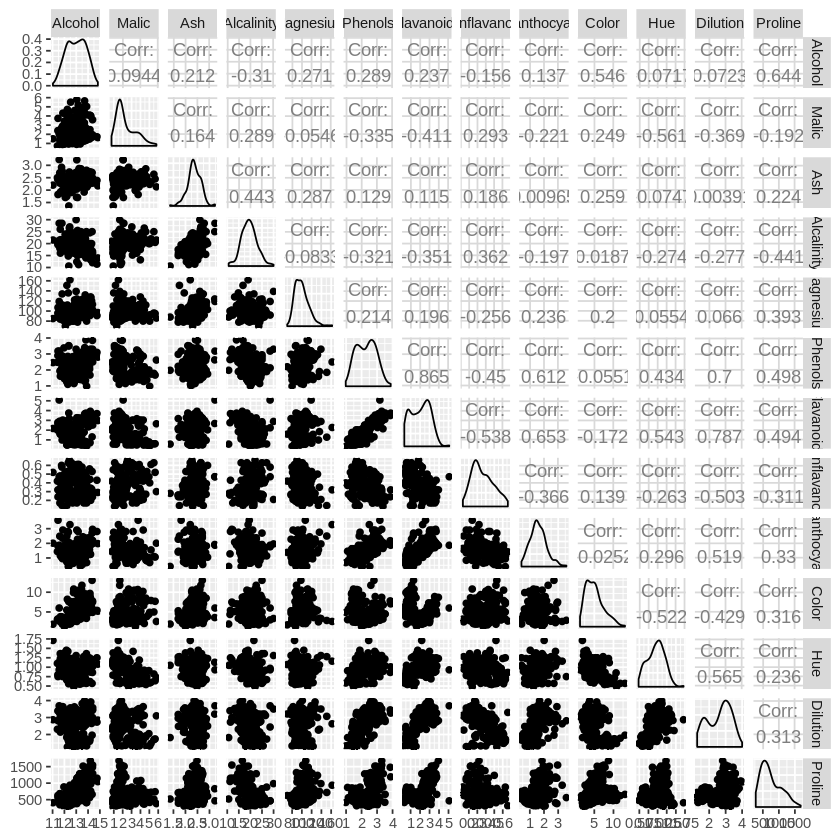

In [37]:
ggpairs(data_cleaned)

As descrições estatísticas são ótimas para ter um **visão geral** do que acontece no dataset, mas não te dá informações sobre uma observação específica. Como essa observação se compara com as outras? Quem é parecido com essa?